# Brain Tumour Detection (Akshita Saxena)

### Importing libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Flatten, Dropout

print("Packages Successfully Imported!")

Packages Successfully Imported!


### Training and Testing Set

In [2]:
trainDataGen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
trainingSet = trainDataGen.flow_from_directory("dataset/train", 
                                               target_size = (128, 128), 
                                               batch_size = 32, 
                                               class_mode = "binary")

Found 2800 images belonging to 2 classes.


In [3]:
trainingSet.class_indices

{'no': 0, 'yes': 1}

In [5]:
testDataGen = ImageDataGenerator(rescale = 1./255)
testSet = validDataGen.flow_from_directory("dataset/test", 
                                           target_size = (128, 128), 
                                           batch_size = 32, 
                                           class_mode = "binary")

Found 200 images belonging to 2 classes.


### Model Architecture

In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size = 3, input_shape=(128, 128, 3), activation ='relu', padding = 'Same'))
model.add(Conv2D(32, kernel_size = 3,  activation ='relu', padding = 'Same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = 2))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size = 3, activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = 3, activation ='relu', padding = 'Same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = 2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [9]:
model.compile(loss = "binary_crossentropy", optimizer='Adam', metrics=["accuracy"])

In [10]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        3

### Model Training

In [11]:
history = model.fit(x = trainingSet, validation_data = testSet, epochs = 35, verbose = 2)

Epoch 1/35
88/88 - 241s - loss: 4.8003 - accuracy: 0.6611 - val_loss: 11.6498 - val_accuracy: 0.5200
Epoch 2/35
88/88 - 192s - loss: 0.7084 - accuracy: 0.7254 - val_loss: 22.8691 - val_accuracy: 0.5050
Epoch 3/35
88/88 - 192s - loss: 0.4985 - accuracy: 0.7721 - val_loss: 11.6642 - val_accuracy: 0.5300
Epoch 4/35
88/88 - 184s - loss: 0.5494 - accuracy: 0.7836 - val_loss: 9.4276 - val_accuracy: 0.5250
Epoch 5/35
88/88 - 182s - loss: 0.4380 - accuracy: 0.8061 - val_loss: 6.0463 - val_accuracy: 0.5300
Epoch 6/35
88/88 - 143s - loss: 0.3895 - accuracy: 0.8357 - val_loss: 2.4114 - val_accuracy: 0.6300
Epoch 7/35
88/88 - 147s - loss: 0.3531 - accuracy: 0.8546 - val_loss: 1.2955 - val_accuracy: 0.7000
Epoch 8/35
88/88 - 150s - loss: 0.3058 - accuracy: 0.8707 - val_loss: 0.8136 - val_accuracy: 0.7550
Epoch 9/35
88/88 - 138s - loss: 0.2699 - accuracy: 0.8868 - val_loss: 0.5783 - val_accuracy: 0.7950
Epoch 10/35
88/88 - 152s - loss: 0.2590 - accuracy: 0.8929 - val_loss: 0.5263 - val_accuracy: 0.8

### Model Performance

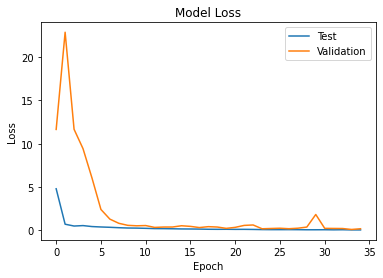

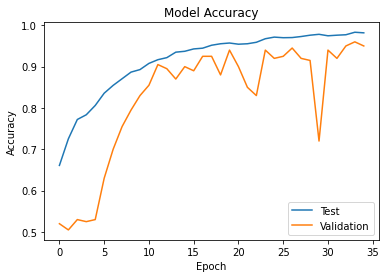

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='lower right')
plt.show()

### Saving the model

In [14]:
model.save("BrainTumorClassifier.h5")

### Detections

In [15]:
cnn = load_model("BrainTumorClassifier.h5")

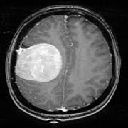

100.0 % chance of Brain Tumor.
Yes


In [18]:
# Yes 1
test = image.load_img("dataset/val/Y1.jpg", target_size = (128, 128))
display(test)
test = image.img_to_array(test)
# add an outer batch axis (128*128*3 => 1,128,128,3)
test = np.expand_dims(test, 0)
result = cnn.predict(test/255.0)
print("{} % chance of Brain Tumor.".format(result[0][0]*100))
if result[0][0] < 0.5:
    print("No")
else:
    print("Yes")

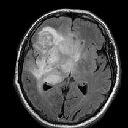

100.0 % chance of Brain Tumor.
Yes


In [19]:
# Yes 2
test = image.load_img("dataset/val/Y2.jpg", target_size = (128, 128))
display(test)
test = image.img_to_array(test)
test = np.expand_dims(test, 0)
result = cnn.predict(test/255.0)
print("{} % chance of Brain Tumor.".format(result[0][0]*100))
if result[0][0] < 0.5:
    print("No")
else:
    print("Yes")

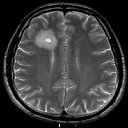

99.75849986076355 % chance of Brain Tumor.
Yes


In [20]:
# Yes 3
test = image.load_img("dataset/val/Y3.jpg", target_size = (128, 128))
display(test)
test = image.img_to_array(test)
test = np.expand_dims(test, 0)
result = cnn.predict(test/255.0)
print("{} % chance of Brain Tumor.".format(result[0][0]*100))
if result[0][0] < 0.5:
    print("No")
else:
    print("Yes")

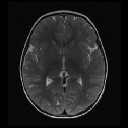

0.0012104102097509895 % chance of Brain Tumor.
No


In [21]:
# No 1
test = image.load_img("dataset/val/N1.jpeg", target_size = (128, 128))
display(test)
test = image.img_to_array(test)
test = np.expand_dims(test, 0)
result = cnn.predict(test/255.0)
print("{} % chance of Brain Tumor.".format(result[0][0]*100))
if result[0][0] < 0.5:
    print("No")
else:
    print("Yes")

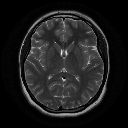

0.0012711304407275748 % chance of Brain Tumor.
No


In [22]:
# No 2
test = image.load_img("dataset/val/N2.jpeg", target_size = (128, 128))
display(test)
test = image.img_to_array(test)
test = np.expand_dims(test, 0)
result = cnn.predict(test/255.0)
print("{} % chance of Brain Tumor.".format(result[0][0]*100))
if result[0][0] < 0.5:
    print("No")
else:
    print("Yes")

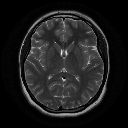

0.0012711304407275748 % chance of Brain Tumor.
No


In [23]:
# No 3
test = image.load_img("dataset/val/N2.jpeg", target_size = (128, 128))
display(test)
test = image.img_to_array(test)
test = np.expand_dims(test, 0)
result = cnn.predict(test/255.0)
print("{} % chance of Brain Tumor.".format(result[0][0]*100))
if result[0][0] < 0.5:
    print("No")
else:
    print("Yes")